# P03 Implementing a Neural Network

In this practical, we are going to develop the code for a two layer neural network to perform classification.

* Implement a **two layer neural network** 
* Implement the **softmax loss function** to train the neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Architecture Description

Today, we are going to build the following  neural network:

* **input layer**: Every sample has a total of four features 
* **hidden layer**: 10 nodes per samplem
* **output layer**: 3 possible classes
* **loss**: Softmax loss

<img src="imgs\P03_twolayernet.png" width="60%">

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3

## Generate dataset

To start, let's create some toy data to check on your  implementations. Note that we set the random seed to 0 for repeatable experiments.

In [3]:
num_inputs = 5 # five samples

def init_toy_data():
    np.random.seed(1) 
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

X, y = init_toy_data()

## Developing the neural net code

In this section, we shall implement the two layer neural net in the class **`TwoLayerNet`** in **`lib/neural_net.py`**. 


 The network parameters are stored in the instance variable **`self.params`** where keys are string parameter names and values are numpy arrays (Refer to the function **`__init__`**). 

The following code initializes the neural net. Again, we set the random seed to a fixed value for repeatable experiments.

In [4]:
np.random.seed(0) 
net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

**Exercise 1: Implement the forward pass (compute scores)**

Open the file **`lib/neural_net.py`** and look at the method **`TwoLayerNet.loss`**. This function is very similar to the loss functions you have written for the SVM exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. Note that the scores is a matrix of size `[NxC]` where `N` is the number of samples and `C` is the number of classes.

If you have implemented the section correctly, then the difference between your score and the correct score should be very small (i.e., < 1e-7)


In [5]:
scores = net.loss(X)
print('Your scores:\n', scores)
print('\ncorrect scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

diff = np.sum(np.abs(scores - correct_scores))
print('Difference between your scores and correct scores:')
print(diff)
if diff < 1e-7:
    print('\nCongrats! You have implemented the forward function correctly')
else:
    print('\nSorry, you still need to work on your code')

Your scores:
 [[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08

Congrats! You have implemented the forward function correctly


**Exercise 2: Implement the softmax loss function**

In the same function, implement the second part that computes the data and regularizaion loss.

If your implementation is correct, the difference between your loss and the correct loss should be very small (i.e., < 1e-12)

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


**Exercise 3: Implement the predict function**

Now implement the predict function to predict the label of a dataset.


In [7]:
np.random.seed(10) 
net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
y_pred = net.predict(X)

print("Predicted:", y_pred)
print("Expected: [0, 1, 1, 1, 2]")

if np.sum(y_pred == [0, 1, 1, 1, 2]) == num_inputs:
    print("Congratulations! You have implemented the predict function correctly")
else:
    print("Opps! Some problem with your implementation")

Predicted: [0 1 1 1 2]
Expected: [0, 1, 1, 1, 2]
Congratulations! You have implemented the predict function correctly


# Train the network
To train the network we will use Stochastic gradient descent (SGD), similar to our multi-class SVM linear classifier. 


**Exercise 4: Stochastic gradient descent**

Complete the second section function **`TwoLayerNet.train`** and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used in the previous practical. 

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

In [8]:
np.random.seed(0) 
net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

stats_no_schedule = net.train(
            X, y, 
            X, y,
            learning_rate=1e-1, 
            learning_rate_decay=1.0,
            reg=5e-6,
            num_epochs=40, 
            verbose=1)

print('Final training loss: ', stats_no_schedule['loss_history'][-1])


epoch    1/40   it 1    | epit    1/1    | loss 1.2659 | train_acc 0.6000 | val_acc 0.6000
epoch    2/40   it 2    | epit    1/1    | loss 0.8928 | train_acc 1.0000 | val_acc 1.0000
epoch    3/40   it 3    | epit    1/1    | loss 0.7061 | train_acc 1.0000 | val_acc 1.0000
epoch    4/40   it 4    | epit    1/1    | loss 0.5414 | train_acc 1.0000 | val_acc 1.0000
epoch    5/40   it 5    | epit    1/1    | loss 0.3868 | train_acc 1.0000 | val_acc 1.0000
epoch    6/40   it 6    | epit    1/1    | loss 0.2651 | train_acc 1.0000 | val_acc 1.0000
epoch    7/40   it 7    | epit    1/1    | loss 0.1794 | train_acc 1.0000 | val_acc 1.0000
epoch    8/40   it 8    | epit    1/1    | loss 0.1263 | train_acc 1.0000 | val_acc 1.0000
epoch    9/40   it 9    | epit    1/1    | loss 0.0926 | train_acc 1.0000 | val_acc 1.0000
epoch   10/40   it 10   | epit    1/1    | loss 0.0703 | train_acc 1.0000 | val_acc 1.0000
epoch   11/40   it 11   | epit    1/1    | loss 0.0555 | train_acc 1.0000 | val_acc 1.0000

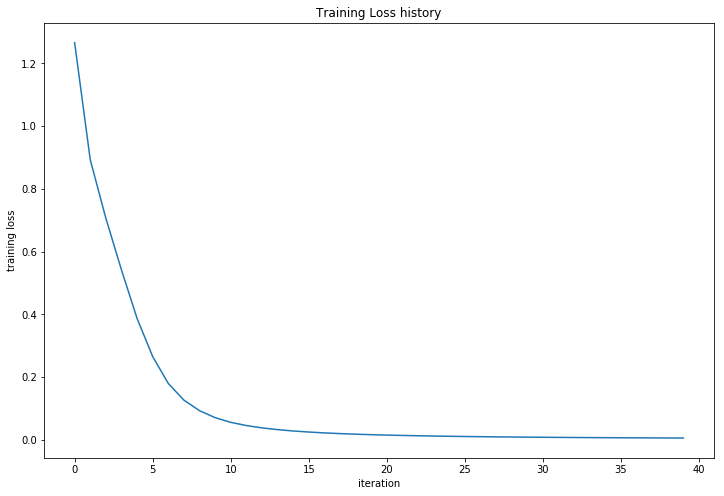

In [9]:
# plot the loss history
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.plot(stats_no_schedule['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

**Exercise 5: Implement a learning rate schedule**

When training deep neural networks, it is often useful to reduce learning rate as the training progresses. This can be done by using pre-defined learning rate schedules or adaptive learning rate methods. In this practical, we shall adjust the learning rate at every epoch where we decay `learning_rate` at a rate of `learning_rate_decay`.

Complete the relevant section in function **`TwoLayerNet.train`** to implement the scheduled learning rate. Implementation-wise you simply need to multiply `learning_rate` with  `learning_rate_decay`.

Final training loss (no schedule):  0.005386405939741455
Final training loss (with schedule):  0.019848315467974324


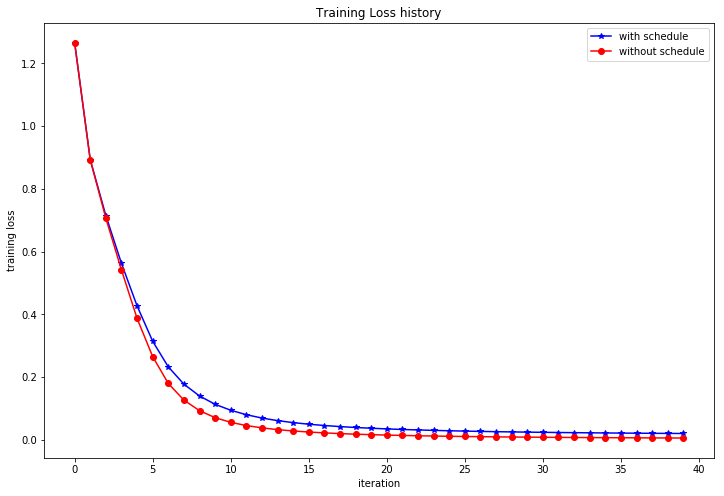

In [10]:
np.random.seed(0) 
net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

stats = net.train(X, y, X, y,
            learning_rate=1e-1, 
            learning_rate_decay=0.95,
            reg=5e-6,
            num_epochs=40, verbose=0)

print('Final training loss (no schedule): ', stats_no_schedule['loss_history'][-1])
print('Final training loss (with schedule): ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'], 'b*-', label = 'with schedule')
plt.plot(stats_no_schedule['loss_history'], 'ro-', label = 'without schedule')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.legend(loc='best')
plt.show()

For this example, scheduled learning rate does not show any particular advantage because the problem is too simple (decaying the learning rate causes the parameter to be updated slower). However, in practice, a scheduled learning rate has been shown to be very useful and outperforms training without the scheme.  

**Exercise 6: Show the training and validation result after each epoch**

Finaly, show the training and validation result after each epoch.

Complete the relevant section of function **`TwoLayerNet.train`** to compute the training and validation result after each epoch. 

epoch    1/40   it 1    | epit    1/1    | loss 1.2659 | train_acc 0.6000 | val_acc 0.6000
epoch    2/40   it 2    | epit    1/1    | loss 0.8928 | train_acc 1.0000 | val_acc 1.0000
epoch    3/40   it 3    | epit    1/1    | loss 0.7146 | train_acc 1.0000 | val_acc 1.0000
epoch    4/40   it 4    | epit    1/1    | loss 0.5623 | train_acc 1.0000 | val_acc 1.0000
epoch    5/40   it 5    | epit    1/1    | loss 0.4267 | train_acc 1.0000 | val_acc 1.0000
epoch    6/40   it 6    | epit    1/1    | loss 0.3138 | train_acc 1.0000 | val_acc 1.0000
epoch    7/40   it 7    | epit    1/1    | loss 0.2324 | train_acc 1.0000 | val_acc 1.0000
epoch    8/40   it 8    | epit    1/1    | loss 0.1772 | train_acc 1.0000 | val_acc 1.0000
epoch    9/40   it 9    | epit    1/1    | loss 0.1395 | train_acc 1.0000 | val_acc 1.0000
epoch   10/40   it 10   | epit    1/1    | loss 0.1130 | train_acc 1.0000 | val_acc 1.0000
epoch   11/40   it 11   | epit    1/1    | loss 0.0940 | train_acc 1.0000 | val_acc 1.0000

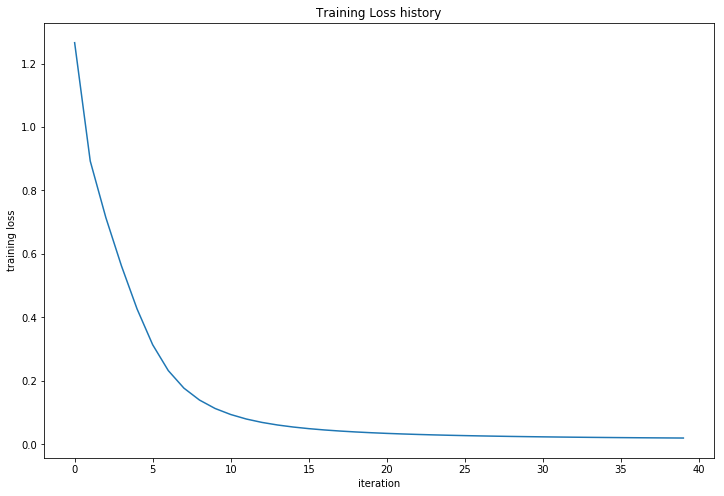

In [11]:
np.random.seed(0) 
net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

stats = net.train(X, y, X, y,
            learning_rate=1e-1, 
            learning_rate_decay=0.95,
            reg=5e-6,
            num_epochs=40, verbose=2)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Course Assignment 3 (3 marks)

Now that you have implemented a two-layer network that works on toy data, it's time to train our classifier on a real dataset. Apply the model you have built on CIFAR-10.

In the following, we load the CIFAR-10 dataset, perform the training for 10 epochs and evaluate the performance on the training and evaluation set. 

In [12]:
from lib import cifar10
from lib import common
import numpy as np
import matplotlib.pyplot as plt

# set the plot
plt.rcParams['image.interpolation'] = 'nearest'

# set to automatic reload
%load_ext autoreload             
%autoreload 2 

# Load the training set
X_train, y_train, X_val, y_val, X_test, y_test = cifar10.get_CIFAR10_data (
    r'./data/cifar-10-batches-py', 
    num_training = 49000,
    num_validation = 1000,
    num_test = 10000,
    num_dev = -1, 
    b_center = True,  
    b_add_bias = False)

classes = cifar10.get_classes()
num_classes = len(classes)
print('classes:', classes)
print('Shape of training samples:', X_train.shape)
print('Shape of validation samples:',  X_val.shape)
print('Shape of testing samples:',  X_test.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Load ./data/cifar-10-batches-py/data_batch_1
Load ./data/cifar-10-batches-py/data_batch_2
Load ./data/cifar-10-batches-py/data_batch_3
Load ./data/cifar-10-batches-py/data_batch_4
Load ./data/cifar-10-batches-py/data_batch_5
Load ./data/cifar-10-batches-py/test_batch
classes: ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Shape of training samples: (49000, 3072)
Shape of validation samples: (1000, 3072)
Shape of testing samples: (10000, 3072)


In [13]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

# Construct the  network
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
print('\n---- Training network -----')
stats = net.train(
            X_train, y_train, 
            X_val, y_val,
            max_iters =1000, 
            batch_size=200,
            learning_rate=1e-4, 
            learning_rate_decay=0.95,
            reg=0.25, 
            verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


---- Training network -----
                it  1   | epit    1/245  | loss 2.3030
                it 101  | epit  101/245  | loss 2.3024
                it 201  | epit  201/245  | loss 2.2973
epoch    1/5    it 245  | epit  245/245  | loss 2.2908 | train_acc 0.1740 | val_acc 0.1780
                it 301  | epit   56/245  | loss 2.2711
                it 401  | epit  156/245  | loss 2.1858
epoch    2/5    it 490  | epit  245/245  | loss 2.1240 | train_acc 0.1973 | val_acc 0.2120
                it 501  | epit   11/245  | loss 2.0965
                it 601  | epit  111/245  | loss 2.1035
                it 701  | epit  211/245  | loss 2.0266
epoch    3/5    it 735  | epit  245/245  | loss 2.0415 | train_acc 0.2584 | val_acc 0.2720
                it 801  | epit   66/245  | loss 1.9708
                it 901  | epit  166/245  | loss 1.9519
epoch    4/5    it 980  | epit  245/245  | loss 1.9036 | train_acc 0.2933 | val_acc 0.2910
epoch    5/5    it 1000 | epit   20/245  | loss 1.9368 | 

### Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This is not very good.

To find out what went wrong, we can do the following:
* One strategy for getting insight into what's wrong is to *plot the loss function and the accuracies on the training and validation sets* during optimization.
* Another strategy is to *visualize the weights in the first layer of the network*. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

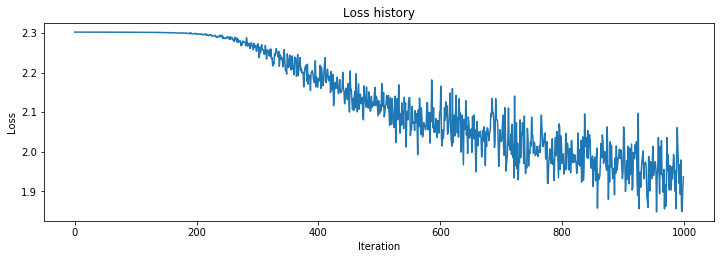

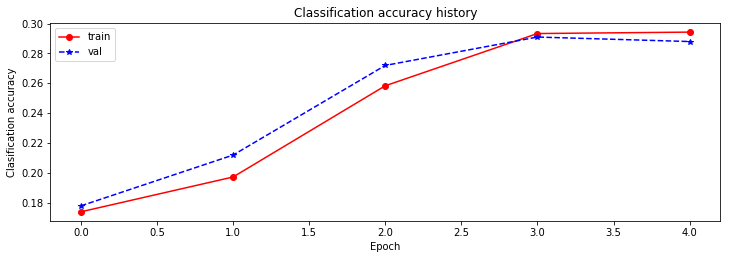

In [14]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], 'ro-', label='train')
plt.plot(stats['val_acc_history'], 'b*--', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(loc='best')
plt.show()

**What's wrong?** Look at graphs plotted above. Check the model if it has the following issues: 
* If the loss is decreasing more or less linearly, this suggests that the learning rate may be too low. 
* If there is no gap between the training and validation accuracy, this suggests that the model we used has low capacity, and that we should increase its size. 
* On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.


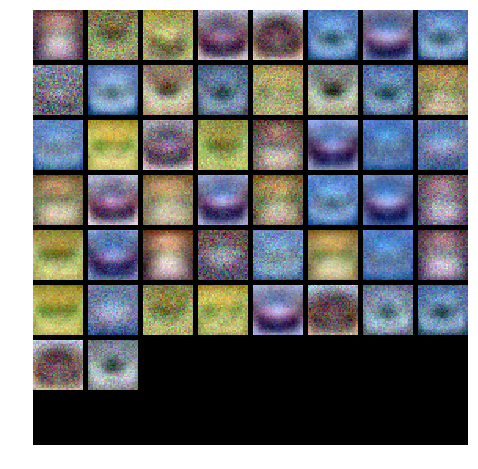

In [15]:
from lib.common import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

**What's wrong?** The code above visualize the weights in the first layer. This is done by reshaping individual row of the weight to fit the shape of the input image. In this sense, each row in the weight matrix represents a 'template image'. Notice that the template image are quite noisy and does not resemble any of the evaluated concept. 

# Task: Tune your hyperparameters

Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks. 

Below, you should experiment with different values of the various hyperparameters (*number of hidden units*, *learning rate*, *number of training epochs* and *regularization strength*). You might also consider tuning the *learning rate decay*, but you should be able to get good performance using the default value (0.95). Your goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. You should aim to achieve a classification accuracy of greater than 50% on both the validation set and testing set. 

Here are some guidelines:
* To start, you may begin by tweaking the hyperparameter by hand to *find the working range* of each parameters. Start with the learning rate as it is the most important.                                                     
* Then, write the code and use *Random Search* to sweep through possible combinations of hyperparameters automatically. You should do this in several runs, starting with a coarse range and slowly refining the range.          
* To debug your network, you may want to use the *visualizations* similar to the ones we used above; The best setting will have significant qualitative differences from the ones we saw above for the poorly tuned network.      

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO:                                                                         # 
# Tune hyperparameters (learning rate, regularization strength and learning     #
# rate decay using the validation set. Copy and modify the code from the        #
# previous practical.                                                           # 
#                                                                               #
# Save the trained model in 'best_net'                                          #
#                                                                               #
#################################################################################

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; the test accuracy should be above 48%.

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)